In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ParameterGrid
from statistics import mean
import time
import statistics
import numpy as np
import random
from operator import itemgetter

In [27]:
# Data prep
data = pd.read_table('iris.data', sep = ',', names = ['sep_len','sep_wid','pet_len','pet_wid','str_lbl'])
l1 = [0]*50
l2 = [1]*50
l3 = [2]*50
l_tot = l1 + l2 + l3
data['num_lab'] = l_tot
X , y = data.iloc[:,0:3], data['num_lab']

In [3]:
# Set x and y axis of hyperparamter inspection grid
ada_params={'n_estimators':[5, 10, 15, 20, 25, 30, 50 , 100,],
          'learning_rate':[0.001, .005, 0.01, 0.02 ,0.05 ,0.1 , 1, 1.5]}

In [6]:
# Quality of learning environment
# Generate Q matrix
ada_config=list(ParameterGrid(ada_params))
grid2 = pd.DataFrame()
start  = time.time()
main_list_timed = []
for progress, i in enumerate(ada_config):
    clf=AdaBoostClassifier(**i)
    r = list(i.values())[0]
    e = list(i.values())[1]
#     grid2.loc[e,r] = tpl[1]
    score_list = []
    for cross_fold in list(range(0,25)):
        X_train, X_test, y_train, y_test = train_test_split(X , y)
        clf.fit(X_train, y_train)
        score_list.append(round(clf.score(X_test, y_test), 4))
#         print(clf.score(X_test, y_test))
    mean_score = mean(score_list)
    grid2.loc[e,r] = mean_score
    variance = statistics.variance(score_list)
    loop_time = time.time() - start
    main_list_timed.append((clf, mean_score, variance, loop_time))
    if progress in np.arange(10,90,10):
        print(progress)
#     print(score_list)
end_time = time.time() - start

10
20
30
40
50
60


In [11]:
end_time

71.16773319244385

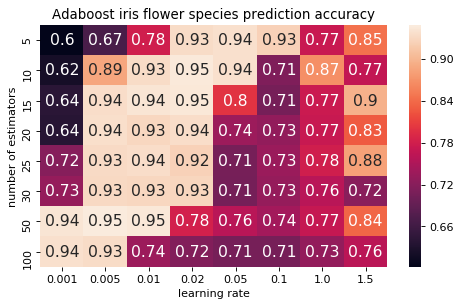

In [9]:
figure(figsize=(7, 4), dpi=80)
sns.heatmap(grid2, annot = True, annot_kws={'size':14})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xlabel('learning rate')
plt.ylabel('number of estimators')
plt.title('Adaboost iris flower species prediction accuracy')
plt.savefig('heatmap2.3.png')

plt.show()

In [14]:
# Variance object for plot
grid3 = pd.DataFrame()
for progress, i in enumerate(ada_config):
    clf=AdaBoostClassifier(**i)
    r = list(i.values())[0]
    e = list(i.values())[1]
    grid3.loc[e,r] = main_list_timed[progress][2]

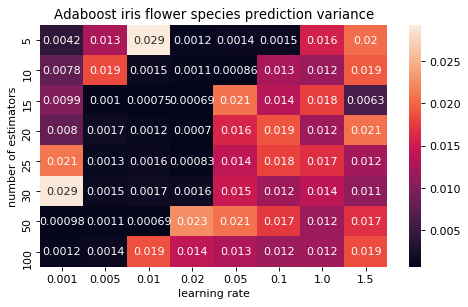

In [15]:
figure(figsize=(7, 4), dpi=80)
sns.heatmap(grid3, annot = True, annot_kws={'size':10})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xlabel('learning rate')
plt.ylabel('number of estimators')
plt.title('Adaboost iris flower species prediction variance')

plt.savefig('heatmap2.3-var.png')
plt.show()

In [16]:
# Prediction time plot data processing
grid4 = pd.DataFrame()
for progress, i in enumerate(ada_config):
    if progress == 0:
        clf=AdaBoostClassifier(**i)
        r = list(i.values())[0]
        e = list(i.values())[1]
        grid4.loc[e,r] = main_list_timed[progress][3]
    else:
        clf=AdaBoostClassifier(**i)
        r = list(i.values())[0]
        e = list(i.values())[1]
        grid4.loc[e,r] = main_list_timed[progress][3] - main_list_timed[progress-1][3]

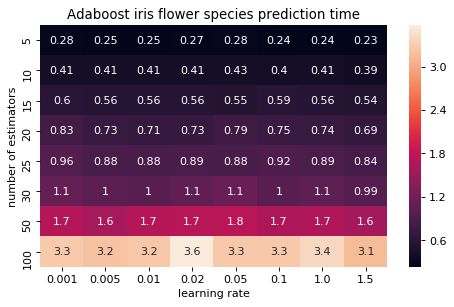

In [17]:
# Prediction time plot
figure(figsize=(7, 4), dpi=80)
sns.heatmap(grid4, annot = True, annot_kws={'size':10})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xlabel('learning rate')
plt.ylabel('number of estimators')
plt.title('Adaboost iris flower species prediction time')

plt.savefig('heatmap2.3-time.png')
plt.show()

In [12]:
def run_classification(X,y,clf):
    start = time.time()
    score_list = []
    for cross_fold in list(range(0,25)):
        X_train, X_test, y_train, y_test = train_test_split(X , y)
        clf.fit(X_train, y_train)
        score_list.append(round(clf.score(X_test, y_test), 4))
    mean_score = mean(score_list)
    variance = statistics.variance(score_list)
    run_time = time.time() - start
    return mean_score, variance, run_time

In [18]:
# Main
for run in list(range(1,2)): # Number of test runs, names output files
    start = time.time()

    # 95 * 31 = 2945 possible states
    n_Est_range = [5, 100] # bounds on state space for nunmber of estimators and learning rate
    LR_range = [.001, 2]

    n_Est_list = list(range(5,100,1)) # 95 values for number of esitmators
    n_Est = random.randrange(5,100,1)
    print(n_Est)
    rate_sections = [0.001, 0.005] + list(np.linspace(0.01, 0.1, 10)) + list(np.linspace(0.2, 2, 19))
    LR_list = []
    for i in rate_sections:
        ir = round(i,3)
        LR_list.append(ir) # 31 values for learning rates

    LR = random.choice(LR_list)
    print(LR)

    Qtable = pd.DataFrame(columns = ['State', 'Increase_n_Est', 'Decrease_n_Est', 'Increase_LR', 'Decrease_LR'])
    S_table = pd.DataFrame(columns = ['State', 'n_Estimators', 'Learning_rate', 'Score', 'Variance', 'Time'])

    # Solve system of Bellman equations for full implementation

    # Make a starting prediction
    hyper_params = {'n_estimators': n_Est, 'learning_rate': LR}
    clf = AdaBoostClassifier(**hyper_params)
    raw_Q = run_classification(X,y,clf)

    mean_score = raw_Q[0]
    variance = raw_Q[1]
    run_time = raw_Q[2]

    # # Update Q table
    # # Q(s,a) = v = Q(s,a) + Eta[reward(s,a) + gamma[max[Q(s^,a^)]] - Q(s,a)]

    reward = [1 * mean_score + 0 * variance + 0 * run_time]

    # Initialize action Q values
    # lr_up, lr_dn, est_up, est_dn = random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)
    est_up, est_dn, lr_up, lr_dn  = 0, 0, 0, 0

    # Initialize state table, state zero, starting point to look around from
    columns, values = list(S_table), [0, n_Est, LR, mean_score, variance, run_time]
    S_table = S_table.append(dict(zip(columns, values)), True)

    # Initialize Q table, state zero, all zeros
    columns, values = list(Qtable), [0, est_up, est_dn, lr_up, lr_dn]
    Qtable = Qtable.append(dict(zip(columns, values)), True)

    # Search loop, exploitation vs. exploration
    est_step = 5
    LR_step = 1
    for i in list(range(1,40)):
        print('i = '+str(i))

        columns, values = list(Qtable), [i, 0, 0, 0, 0] # Add row starting with state one
        Qtable = Qtable.append(dict(zip(columns, values)), True)

        n_Est_indx = n_Est_list.index(n_Est) # get index numbers
        LR_indx = LR_list.index(LR)
        Q_list = []
        if n_Est_indx+5 >= 94:
            Qtable.iloc[i,1] = 0
            Q_list.append((0,0,0))
        else:
            hyper_params = {'n_estimators': n_Est_list[n_Est_indx+5], 'learning_rate': LR}
            clf = AdaBoostClassifier(**hyper_params)
            raw_Q = run_classification(X,y,clf)
            est_up = 1 * raw_Q[0] + .0001/raw_Q[1] # Value prediction incorporates variance
            Qtable.iloc[i,1] = est_up     
            Q_list.append(raw_Q)

        if n_Est_indx-5 <= 0:
            Qtable.iloc[i,2] = 0
            Q_list.append((0,0,0))
        else:
            hyper_params = {'n_estimators': n_Est_list[n_Est_indx-5], 'learning_rate': LR}
            clf = AdaBoostClassifier(**hyper_params)
            raw_Q = run_classification(X,y,clf)
            est_dn = 1 * raw_Q[0] + .0001/raw_Q[1]
            Qtable.iloc[i,2] = est_dn
            Q_list.append(raw_Q)

        if LR_indx+1 >= 30:
            Qtable.iloc[i,3] = 0
            Q_list.append((0,0,0))
        else:
            hyper_params = {'n_estimators': n_Est, 'learning_rate': LR_list[LR_indx+1]}
            clf = AdaBoostClassifier(**hyper_params)
            raw_Q = run_classification(X,y,clf)
            lr_up = 1 * raw_Q[0] + .0001/raw_Q[1]
            Qtable.iloc[i,3] = lr_up
            Q_list.append(raw_Q)

        if LR_indx-1 <= 0:
            Qtable.iloc[i,4] = 0
            Q_list.append((0,0,0))
        else:
            hyper_params = {'n_estimators': n_Est, 'learning_rate': LR_list[LR_indx-1]}
            clf = AdaBoostClassifier(**hyper_params)
            raw_Q = run_classification(X,y,clf)
            lr_dn = 1 * raw_Q[0] + .0001/raw_Q[1]
            Qtable.iloc[i,4] = lr_dn
            Q_list.append(raw_Q)

        res = max(Q_list, key=itemgetter(0))
        action = Q_list.index(max(Q_list))

        if action == 0:
            n_Est =  n_Est_list[n_Est_indx+5]
        if action == 1:
            n_Est =  n_Est_list[n_Est_indx-5]        
        if action == 2:
            LR = LR_list[LR_indx+1]
        if action == 3:
            LR = LR_list[LR_indx-1]

        columns, values = list(S_table), [i, n_Est, LR, res[0], res[1], res[2]]
        S_table = S_table.append(dict(zip(columns, values)), True)

        # Check if random jump improves score
        if i in [5,10,15,20,25,30]: #,24,32,40,48,56,64,72,80,88,96]:
            print("Explore random point")
            rand_n_Est = random.randrange(5,100,1)
            rand_LR = random.choice(LR_list)
            hyper_params = {'n_estimators': rand_n_Est, 'learning_rate': rand_LR}
            clf = AdaBoostClassifier(**hyper_params)
            raw_Q = run_classification(X,y,clf)

            rand_mean_score = raw_Q[0]
            if rand_mean_score > S_table.iloc[i,3]:
                print('Random jump improves score')
                n_Est = rand_n_Est
                LR = rand_LR
            else:
                print("random point lower than current score")
    #     break
    print('Maximum scoring hyperparameter combination found, run ' + str(run))
    S_table.to_csv('S_tab_test.'+str(run)+'.tsv', sep = '\t',index = False)
    Qtable.to_csv('Q_tab_test.'+str(run)+'.tsv', sep = '\t',index = False)

85
0.06
i = 1
i = 2
i = 3
i = 4
i = 5
Explore random point
Random jump improves score
i = 6
i = 7
i = 8
i = 9
i = 10
Explore random point
random point lower than current score
i = 11
i = 12
i = 13
i = 14
i = 15
Explore random point
random point lower than current score
i = 16
i = 17
i = 18
i = 19
i = 20
Explore random point
random point lower than current score
i = 21
i = 22
i = 23
i = 24
i = 25
Explore random point
random point lower than current score
i = 26
i = 27
i = 28
i = 29
i = 30
Explore random point
random point lower than current score
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
Maximum scoring hyperparameter combination found, run 1


In [24]:
S_table

,State,n_Estimators,Learning_rate,Score,Variance,Time
0,0.0,85.0,0.060,0.663144,0.012352,2.774451
1,1.0,85.0,0.050,0.782112,0.018212,2.812086
2,2.0,90.0,0.050,0.757900,0.015700,2.914047
3,3.0,85.0,0.050,0.755800,0.015846,2.708048
4,4.0,85.0,0.060,0.763160,0.014201,2.677724
5,5.0,90.0,0.060,0.768416,0.013795,2.906108
6,6.0,16.0,0.020,0.937920,0.000917,0.575589
7,7.0,16.0,0.010,0.938972,0.001138,0.622271
8,8.0,16.0,0.005,0.944236,0.001000,0.580775
9,9.0,21.0,0.005,0.932656,0.001102,0.727993


In [26]:
Qtable

,State,Increase_n_Est,Decrease_n_Est,Increase_LR,Decrease_LR
0,0,0,0,0,0
1,1,0.738122,0.729241,0.743672,0.787603
2,2,0.764269,0.715874,0.756545,0.733565
3,3,0.753919,0.762111,0.732537,0.720965
4,4,0.742263,0.749005,0.770202,0.70768
5,5,0.775665,0.723689,0.725159,0.755907
6,6,1.007544,1.009,1.047015,0.931396
7,7,1.028023,1.042547,1.010322,1.026845
8,8,1.026828,1.048327,1.046863,1.044276
9,9,1.023424,0.925796,0.988474,0


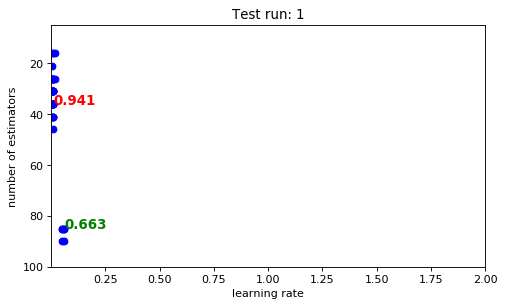

In [20]:
# From state table plot exploration path of RL agent
for i in list(range(1,2)):
    s_tab = pd.read_csv('S_tab_test.'+str(i)+'.tsv',sep = '\t')    
    figure(figsize=(7, 4), dpi=80)
    plt.plot([s_tab.Learning_rate], [s_tab.n_Estimators], 'o', c = 'blue')
    plt.text(list(s_tab.Learning_rate)[0], list(s_tab.n_Estimators)[0], round(list(s_tab.Score)[0], 3),
             c = 'green', fontsize=12, fontweight='bold')
    plt.text(list(s_tab.Learning_rate)[-1], list(s_tab.n_Estimators)[-1], round(list(s_tab.Score)[-1], 3),
             c = 'red', fontsize=12, fontweight='bold')
    plt.xlabel('learning rate')
    plt.ylabel('number of estimators')
    plt.title('Test run: '+str(i))

    plt.xlim([.001,2])
    plt.ylim([5,100])
    plt.gca().invert_yaxis()
    plt.savefig('test_run_'+str(i)+'.png')
    plt.show()